Author:  Raphael Cousin

Project: https://github.com/racousin/algorithms_basics_python

# Theory
we want to find $x^* \in argmin_{x \in K} f(x)$

$K = \mathbb{R}^d$

__Hypothesis:__

(C) $f,K$ convex, $\forall x,y \in K$ : $\lambda x + (1-\lambda) y \in K$ and $f(\lambda x + (1-\lambda) y) \geq  \lambda f(x) + (1-\lambda) f(y)$ whith $\lambda \in [0,1]$

(D) $f$ is differentiable $\forall x,y \in K$ : $f(y) \geq f(x) + \nabla f(x)^T (y - x)$

(G) $f$ is G-Lipschitz $||\nabla f(x)|| \leq G < +\infty$ ie $|f(x) - g(x)| \leq G ||x-y||$

($\alpha$) $f$ is $\alpha$-strongly-convex $\forall x,y\in K$ : $f(y) \geq f(x) + \nabla f(x)^T (y - x) + \frac{\alpha}{2} ||y - x||^2$ (if $f \in C^2$, is equivalent to $\nabla^2 f \leq \alpha I$)

($\beta$) $f$ is $\beta$-smooth $\forall x,y\in K$ : $f(y) \leq f(x) + \nabla f(x)^T (y - x) + \frac{\beta}{2} ||y - x||^2$ (if $f \in C^2$, is equivalent to $\nabla^2 f \geq \beta I$)

($\gamma$) $f$ is $\gamma$-well-conditioned if $f$ is $\beta$-smooth  and $f$ is $\alpha$-strongly-convex, with $\gamma = \frac{\alpha}{\beta}$

__Randomized Gradient Descent:__

* input:

$f$ Objective function

$T$ Number of iteration

$x_0$ Initialisation

$v$ prameter of randomization

* randomization

$\hat{f}(x) = \mathbb{E}_{U\sim B}[f(x +v  U)]$

* return

Gradient_descent($\hat{f}$,T,x_0,s_t=$\frac{v}{dG}$)

__Results:__

$\hat{f}$ is $\alpha$-strongly-convex and $\frac{dG}{v}$-smooth

noting $h_t = f(x_t) - f(x^*)$

assuming (C), (D), (G), and ($\alpha$), we have $h_t = O(\frac{\log{t}}{\alpha t})$ with $v =\frac{d G\log{t}}{\alpha t} $

# Algorithm

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
from scipy.misc import derivative

In [5]:
def grad_desc(f,T,x,s):
    its = np.zeros(T+1)
    its[0] = x
    for i,t in enumerate(range(T)):
        x = x - s * derivative(f,x)
        its[i+1] = x
    return x, its

In [70]:
from scipy.stats import *
np.random.seed(seed=42)
runif = lambda n: uniform(loc=-1,scale=2).rvs(n)

In [71]:
def rand_grad_desc(f,T,x,s,a):
    fhat = lambda x: f(x + a * runif(100)).mean()
    return grad_desc(fhat,T,x,s)

# Example

In [72]:
f = lambda x: 2 * x**2 -x + 32*np.cos(x)
fhat = lambda x: f(x + a * runif(100)).mean()

In [73]:
xs = np.linspace(-10,10,500)

In [74]:
x1 = -10
a = 2

In [75]:
runif(100)

array([-0.25091976,  0.90142861,  0.46398788,  0.19731697, -0.68796272,
       -0.68801096, -0.88383278,  0.73235229,  0.20223002,  0.41614516,
       -0.95883101,  0.9398197 ,  0.66488528, -0.57532178, -0.63635007,
       -0.63319098, -0.39151551,  0.04951286, -0.13610996, -0.41754172,
        0.22370579, -0.72101228, -0.4157107 , -0.26727631, -0.08786003,
        0.57035192, -0.60065244,  0.02846888,  0.18482914, -0.90709917,
        0.2150897 , -0.65895175, -0.86989681,  0.89777107,  0.93126407,
        0.6167947 , -0.39077246, -0.80465577,  0.36846605, -0.11969501,
       -0.75592353, -0.00964618, -0.93122296,  0.8186408 , -0.48244004,
        0.32504457, -0.37657785,  0.04013604,  0.09342056, -0.63029109,
        0.93916926,  0.55026565,  0.87899788,  0.7896547 ,  0.19579996,
        0.84374847, -0.823015  , -0.60803428, -0.90954542, -0.34933934,
       -0.22264542, -0.45730194,  0.65747502, -0.28649335, -0.43813098,
        0.08539217, -0.71815155,  0.60439396, -0.85089871,  0.97

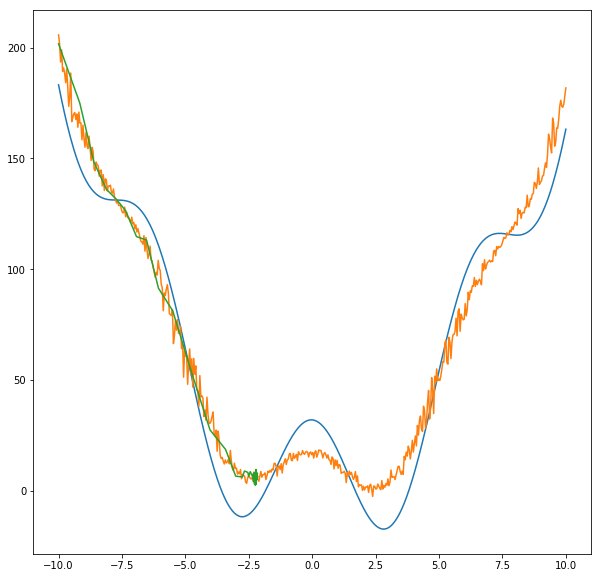

In [78]:
fig, ax = plt.subplots(figsize=(10,10))
xrs, its = rand_grad_desc(f,100,-10,1/50,a)
ax.plot(xs,f(xs))
ax.plot(xs,[fhat(x) for x in xs])
ax.plot(its,[fhat(x) for x in its])
#ax.plot(its,f(its),'yo')
#ax.plot(xrs,f(xrs),'or')